In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
df = pd.read_excel('data.xlsx')
X1 = df.to_numpy()
X2 = X1[:,:-1]
Y1 = X1[:,-1:].flatten()

In [0]:
class SupportVectorMachineClassifier:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=500):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        y_ = np.where(Y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [5]:
classifier = SupportVectorMachineClassifier()
classifier.fit(X2,Y1)

print("w is :", classifier.w)
print("b is :", classifier.b)

w is : [-0.60612739 -0.41245691]
b is : -4.980999999999998


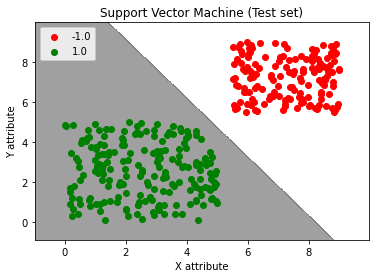

In [6]:
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
XX1, XX2 = np.meshgrid(np.arange(start = X2[:, 0].min() - 1, stop = X2[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X2[:, 1].min() - 1, stop = X2[:, 1].max() + 1, step = 0.01))
plt.contourf(XX1, XX2, classifier.predict(np.array([XX1.ravel(), XX2.ravel()]).T).reshape(XX1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'grey')))
plt.xlim(XX1.min(), XX1.max())
plt.ylim(XX2.min(), XX2.max())
for i, j in enumerate(np.unique(Y1)):
    plt.scatter(X2[Y1 == j, 0], X2[Y1 == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('X attribute')
plt.ylabel('Y attribute')
plt.legend()
plt.show()

In [8]:
#Prediction by using some Unseen data

X = [1.4, 3.8]
prediction = classifier.predict(X)
print(prediction)

X = [8.3, 7.3]
prediction = classifier.predict(X)
print(prediction)

X = [89, 5]
prediction = classifier.predict(X)
print(prediction)

X = [0.4, .06]
prediction = classifier.predict(X)
print(prediction)

X = [14, 6]
prediction = classifier.predict(X)
print(prediction) 

1.0
-1.0
-1.0
1.0
-1.0
